In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

N = 10
years =[1870,1880,1890]

# Load Data

In [2]:
tags_city_1870 = pd.read_pickle('tag_city_1870.pkl')
population_1870 = pd.read_csv('cities_population_1870.csv')

population_1870['city'] = population_1870.city.apply(lambda x: x.strip())
tags_city_1870.index = tags_city_1870.index.str.strip()

tag_total_1870 = tags_city_1870.sum().to_dict()
tags_city_percentage_1870 = pd.DataFrame()
for t in tag_total_1870.keys():
    tags_city_percentage_1870[t] = 100 * tags_city_1870[t]/tag_total_1870[t]

summary_1870 = pd.DataFrame(tags_city_1870.merge(population_1870, on='city').sort_values('city_total',ascending=False)).\
                                                                            rename(columns={'Unnamed: 0':'population_rank'}).head(N)


print(summary_1870[['city','city_total','population_rank']].head(N))


                  city  city_total  population_rank
64   Philadelphia city       11593                1
9        Brooklyn city        8861                2
7          Boston city        8430                6
17        Chicago city        6665                4
1       Allegheny city        5042               22
52      New Haven city        4137               24
89     Washington city        4063               11
5       Baltimore city        3854                5
28           Erie city        3442               71
74  San Francisco city        3318                9


In [3]:
tags_city_1880 = pd.read_pickle('tag_city_1880.pkl')
population_1880 = pd.read_csv('cities_population_1880.csv')
population_1880['city'] = population_1880.city.apply(lambda x: x.strip())
tags_city_1880.index = tags_city_1880.index.str.strip()


tag_total_1880 = tags_city_1880.sum().to_dict()
tags_city_percentage_1880 = pd.DataFrame()
for t in tag_total_1880.keys():
    tags_city_percentage_1880[t] = 100 * tags_city_1880[t]/tag_total_1880[t]


summary_1880 = pd.DataFrame(tags_city_1880.merge(population_1880, on='city').sort_values('city_total',ascending=False)).\
                                                                            rename(columns={'Unnamed: 0':'population_rank'}).head(N)


print(summary_1880[['city','city_total','population_rank']].head(N))

                  city  city_total  population_rank
93     Washington city       42938               13
63   Philadelphia city       25501                1
14        Chicago city       24594                3
8        Brooklyn city       23044                2
6          Boston city       17646                4
1       Allegheny city       12265               22
84      St. Louis city       10027                5
51      New Haven city        8950               25
54         Newark city        8370               14
76  San Francisco city        7470                8


In [4]:
tags_city_1890 = pd.read_pickle('tag_city_1890.pkl')
population_1890 = pd.read_csv('cities_population_1890.csv')
population_1890['city'] = population_1890.city.apply(lambda x: x.strip())
tags_city_1890.index = tags_city_1890.index.str.strip()

tag_total_1890 = tags_city_1890.sum().to_dict()
tags_city_percentage_1890 = pd.DataFrame()
for t in tag_total_1890.keys():
    tags_city_percentage_1890[t] = 100 * tags_city_1890[t]/tag_total_1890[t]


summary_1890 = pd.DataFrame(tags_city_1890.merge(population_1890, on='city').sort_values('city_total',ascending=False)).\
                                                                            rename(columns={'Unnamed: 0':'population_rank'}).head(N)


print(summary_1890[['city','city_total','population_rank']].head(N))


                 city  city_total  population_rank
13       Chicago city       30278                1
62  Philadelphia city       23770                2
8       Brooklyn city       17156                3
6         Boston city       13247                5
1      Allegheny city       11409               27
83     St. Louis city       10605                4
55      New York city        9095                0
15     Cleveland city        8358                9
32      Hartford city        8185               53
92    Washington city        7900               13


In [5]:
tags_city_1890.city_total.sum()

322386

# Urbanization in Patents

In [6]:
urbanization = pd.DataFrame(index = ['1870','1880','1890'],columns=['patent_all','patent_urban','population_all','population_urban'])

In [7]:
df_1870 = pd.read_pickle('df_1870.pkl')
df_1880 = pd.read_pickle('df_1880.pkl')
df_1890 = pd.read_pickle('df_1890.pkl')

In [8]:
#tags_city_1870.city_total.sum() 
y_ = ['1870','1880','1890']
p_ = [population_1870, population_1880,population_1890]
pat_ = [df_1870, df_1880,df_1890]
pop_ = [38558371, 50189209, 62979766]
pat_tot_ = []

for i in range(3):
    y = y_[i]
    p = p_[i]
    pat = pat_[i]
    pop = pop_[i]
    urbanization.loc[y] = {'patent_all':pat.shape[0], 'patent_urban':pat[pat.city!=''].shape[0],\
                          'population_all':pop, 'population_urban':p.Population.sum()}
#urbanization.patent_all = [125393, 207341, 205525]

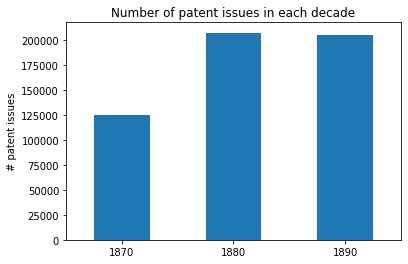

In [9]:
urbanization.patent_all.plot.bar(rot=0)
plt.title('Number of patent issues in each decade')
plt.ylabel('# patent issues')
plt.show()

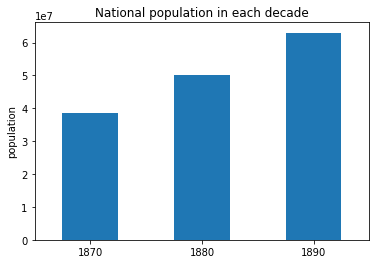

In [10]:
urbanization.population_all.plot.bar(rot=0)
plt.title('National population in each decade')
plt.ylabel('population')
plt.show()

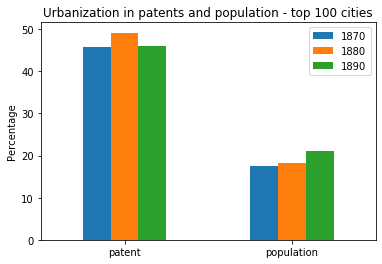

In [11]:
urbanization['patent'] = urbanization.patent_urban/urbanization.patent_all
urbanization['population'] = urbanization.population_urban/urbanization.population_all
(100*urbanization[['patent','population']]).transpose().plot.bar(rot=0)
#plt.xlabel('Tags')
plt.ylabel('Percentage')
plt.title("Urbanization in patents and population - top 100 cities")
plt.show()

In [12]:
temp = pd.merge(summary_1870[['city','city_total','population_rank']], summary_1880[['city','city_total','population_rank']], on='city',how='outer')
summary_merged = pd.merge(temp, summary_1890[['city','city_total','population_rank']], on='city',how='outer')

In [13]:
#summary_merged[['city','city_total_x']].sort_values(by='city_total_x', ascending=False)

In [14]:
#summary_merged[['city','city_total_y']].sort_values(by='city_total_y', ascending=False)

In [15]:
#summary_merged[['city','city_total']].sort_values(by='city_total', ascending=False)

In [16]:
tags = tags_city_1890.columns.tolist()
tags.remove('city_total')
tags

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'Y']

In [17]:
population_merge = pd.merge(population_1870[['city','state','Population']], population_1880[['city','state','Population']], on='city', how='outer')
population_merge = pd.merge(population_merge, population_1890[['city','state','Population']], on='city', how='outer')
population_merge = population_merge.fillna(-1)


population_merge['diff1'] = population_merge['Population_y'] - population_merge['Population_x']
population_merge['diff2'] = population_merge['Population'] - population_merge['Population_y']

population_merge['diff1_rank'] = population_merge.diff1.rank(ascending=False)
population_merge['diff2_rank'] = population_merge.diff2.rank(ascending=False)

# which cities were the leaders in populations?

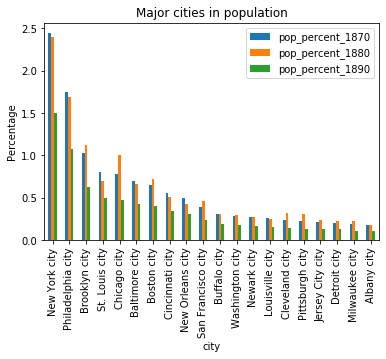

In [18]:
population_merge['pop_percent_1870'] = population_merge.Population_x/pop_[0]
population_merge['pop_percent_1880'] = population_merge.Population_y/pop_[1]
population_merge['pop_percent_1890'] = population_merge.Population_x/pop_[2]

(100*population_merge[['city','pop_percent_1870','pop_percent_1880','pop_percent_1890']].set_index('city').head(20)).plot.bar()
plt.title('Major cities in population')
plt.ylabel('Percentage')
plt.show()

# Which were the leaders of patents?

Aggregate through different tags

In [34]:
tags_city_percentage_list = [tags_city_percentage_1870, tags_city_percentage_1880, tags_city_percentage_1890]
population_list = [population_1870, population_1880, population_1890]
tops_concat = []

for i, tags_ in enumerate(tags_city_percentage_list):
    for t in tags:
        print('\n==========leading cities for tag {0}=========='.format(t))
        top_per_tag = tags_[t].sort_values(ascending=False).head(N)
        tops_concat.extend(top_per_tag.index)
        top_city = tags_['city_total'].sort_values(ascending=False).head(N)
        #print('cities that are not in overall tops : {0}'.format(set(top_per_tag.index) - set(top_city.index)))
        #print('cities that are not in population tops : {0}'.format(set(top_per_tag.index) - set(population_list[i].head(N).city)))
        print(top_per_tag.index)
        #print(top_per_tag.sum())



==========leading cities for tag A==========
Index(['Philadelphia city', 'Boston city', 'Brooklyn city', 'Chicago city',
       'Washington city', 'New Haven city', 'Baltimore city',
       'Providence city', 'Newark city', 'Worcester city'],
      dtype='object', name='city')

==========leading cities for tag B==========
Index(['Philadelphia city', 'Brooklyn city', 'Boston city', 'Chicago city',
       'Allegheny city', 'New Haven city', 'Washington city', 'Baltimore city',
       'Erie city', 'Cincinnati city'],
      dtype='object', name='city')

==========leading cities for tag C==========
Index(['Philadelphia city', 'Allegheny city', 'Brooklyn city', 'Boston city',
       'San Francisco city', 'Chicago city', 'Baltimore city',
       'Washington city', 'Newark city', 'Portland city'],
      dtype='object', name='city')

==========leading cities for tag D==========
Index(['Philadelphia city', 'Boston city', 'Brooklyn city', 'Worcester city',
       'Chicago city', 'Providence city

C:\Users\haeeun\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


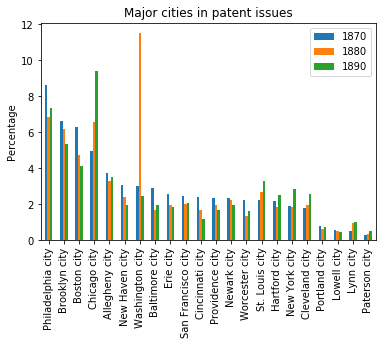

In [37]:
temp = pd.DataFrame()
t = 'city_total'
for i in range(3):

    tags_city_percentage = tags_city_percentage_list[i]
    top_per_tag = pd.DataFrame(tags_city_percentage[t].sort_values(ascending=False)).rename(columns={t:years[i]})
    temp = pd.concat([temp, top_per_tag], axis=1)

temp.loc[list(set(tops_concat))].sort_values(by=1870,ascending=False).plot.bar()
plt.title('Major cities in patent issues')
plt.ylabel('Percentage')
plt.show()

In [40]:
# unexplicable peak in Wachington 1880... drop them :(
tops_concat.remove('Washington city')

# Can we observe fluctuation in patent issue per city, and compare them to the popoulation?

In [22]:
top_cities_before = []

for YEAR in [1870,1880,1890]:
    print('====================================================')
    print('====================================================')
    print('==============={0}==========='.format(YEAR))
    
    tag_city = pd.read_pickle('tag_city_{0}.pkl'.format(YEAR))
    population = pd.read_csv('cities_population_{0}.csv'.format(YEAR))


    tag_total = tag_city.sum().to_dict()
    tags_city_percentage = pd.DataFrame()
    for t in tag_total.keys():
        tags_city_percentage[t] = 100 * tag_city[t]/tag_total[t]

        
    tag_city = tag_city.merge(population, on='city').sort_values('city_total',ascending=False).head(N)
    
    
    print(tag_city[['city','city_total','Unnamed: 0','state']].head(N))
    print('cities dissappeard : {0}'.format(set(top_cities_before) - set(tag_city.city)))
    print('cities emerged : {0}'.format(set(tag_city.city) - set(top_cities_before)))
    
    
    top_cities_before = tag_city.city

===============1870===========
                  city  city_total  Unnamed: 0 state
64   Philadelphia city       11593           1    PA
9        Brooklyn city        8861           2    NY
7          Boston city        8430           6    MA
17        Chicago city        6665           4    IL
1       Allegheny city        5042          22    PA
52      New Haven city        4137          24    CT
89     Washington city        4063          11    DC
5       Baltimore city        3854           5    MD
28           Erie city        3442          71    PA
74  San Francisco city        3318           9    CA
cities dissappeard : set()
cities emerged : {'Washington city', 'Brooklyn city', 'Chicago city', 'Baltimore city', 'New Haven city', 'Erie city', 'Philadelphia city', 'San Francisco city', 'Boston city', 'Allegheny city'}
===============1880===========
                  city  city_total  Unnamed: 0 state
92     Washington city       42938          13    DC
62   Philadelphia city     

# Was the fluctuation in population correlated to the fluctuation of patent issues?

C:\Users\haeeun\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



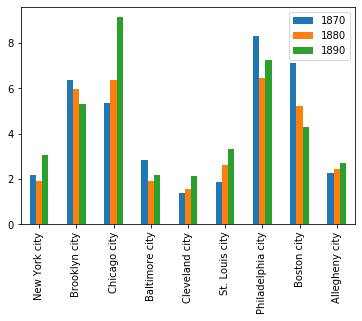

Tag A


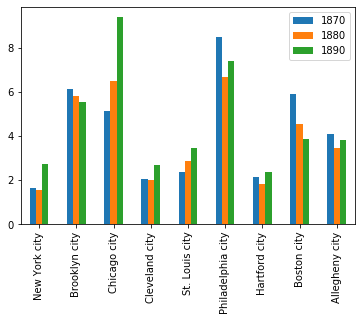

Tag B


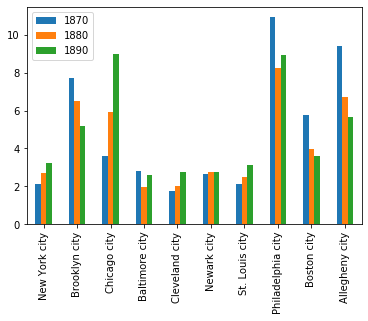

Tag C


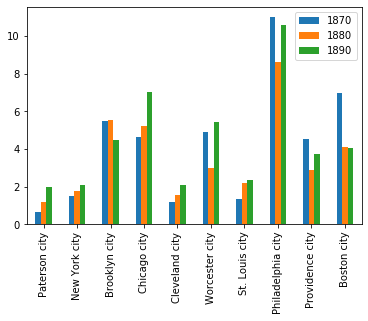

Tag D


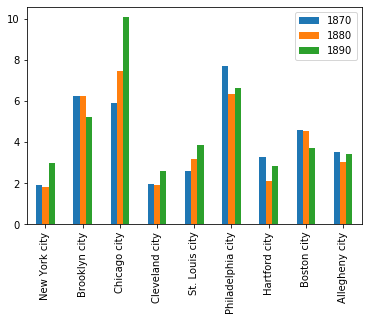

Tag E


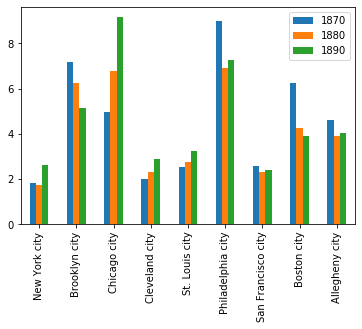

Tag F


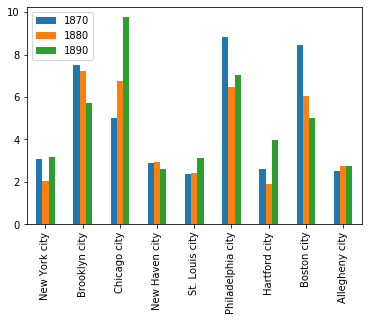

Tag G


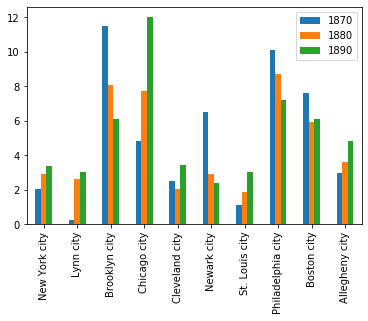

Tag H


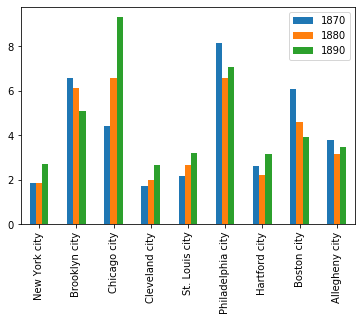

Tag Y


In [45]:

for t in tags:
    print('=============================================================================================')
    temp = pd.DataFrame()
    
    for i in range(3):

        tags_city_percentage = tags_city_percentage_list[i]
        

        top_per_tag = pd.DataFrame(tags_city_percentage[t].sort_values(ascending=False)).rename(columns={t:years[i]})
        
        

        
        
        
        temp = pd.concat([temp, top_per_tag], axis=1)
    

    tops = pd.Index(list(set(top_per_tag.head(N).index) - set(['Washington city'])))
    temp.loc[tops].plot.bar()
    plt.show()
    
    print("Tag {0}".format(t))
    

    


## .... not necessarily. There is no strict correlation between population change and patent issue.

# We can see that some cities (Chicago, Philadelphia..) are strongest players of patents. They are quite huge cities as well. Are Massive cities the main player of patents?
Figure this out by comparing correlation betweent the population density and patent density for cities

In [75]:

print('influence of most populated cities in patents in general : from 1870 to 1890')
for t in ['city_total']:
    print((population_1870[['Population','city']].set_index('city')['Population']/pop_[0]).corr(tags_city_percentage_1870[t]))
    print((population_1880[['Population','city']].set_index('city')['Population']/pop_[1]).corr(tags_city_percentage_1880[t]))
    print((population_1890[['Population','city']].set_index('city')['Population']/pop_[2]).corr(tags_city_percentage_1890[t]))
    print('================')

influence of most populated cities in patents in general : from 1870 to 1890
0.6558616935155847
0.5441211322058931
0.7843068076816236


In [76]:
print('influence of most populated cities in leading cities in patents : from 1870 to 1890')

for t in ['city_total']:
    print((population_1870[['Population','city']].set_index('city').loc[tops_concat]['Population']/pop_[0]).corr(tags_city_percentage_1870.loc[tops_concat][t]))
    print((population_1880[['Population','city']].set_index('city').loc[tops_concat]['Population']/pop_[1]).corr(tags_city_percentage_1880.loc[tops_concat][t]))
    print((population_1890[['Population','city']].set_index('city').loc[tops_concat]['Population']/pop_[2]).corr(tags_city_percentage_1890.loc[tops_concat][t]))
    print('================')

influence of most populated cities in leading cities in patents : from 1870 to 1890
0.4879543912473801
0.18145983808935573
0.7824967506723634


## comparing 1870s and 1890, populated cities are gaining more power even on patents
If taking only 'most patenting cities' into account the correlation is weaker. This implys that the major patenting cities are not neccesarily the most populated cities.


# There are some strongest players in patents in general. Are they strongest throughout the all domains?

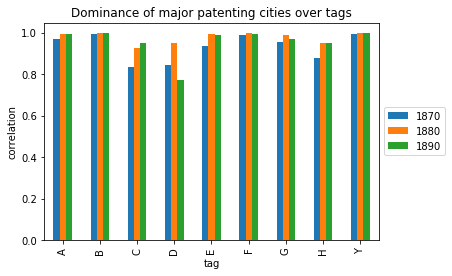

In [54]:


temp = {}
for t in tags:
    l_ = []
    heads = tags_city_percentage_1870.sort_values(by=t,ascending=False).head(20).index
    l_.append(tags_city_percentage_1870.loc[heads][t].corr(tags_city_percentage_1870.loc[heads]['city_total']))

    heads = tags_city_percentage_1880.sort_values(by=t,ascending=False).head(20).index
    l_.append(tags_city_percentage_1880.loc[heads][t].corr(tags_city_percentage_1880.loc[heads]['city_total']))
    
    heads = tags_city_percentage_1890.sort_values(by=t,ascending=False).head(20).index
    l_.append(tags_city_percentage_1890.loc[heads][t].corr(tags_city_percentage_1890.loc[heads]['city_total']))
    temp[t] = l_

pd.DataFrame(temp, index=[1870,1880,1890]).transpose().plot.bar()
plt.title('Dominance of major patenting cities over tags')
plt.xlabel("tag")
plt.ylabel("correlation")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Dominance of major patenting cities is high. However, in one domain, the dominance is decreasing. Let's take a deeper look into that domain, and who's the leader of that industry

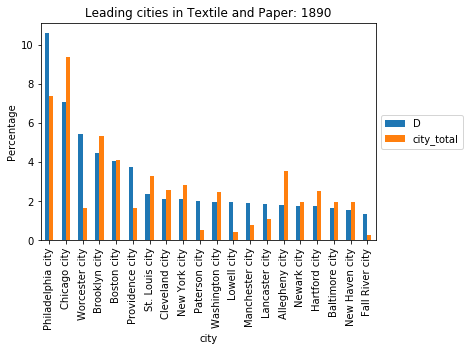

In [59]:
temp = {}

    
t = 'D'    
heads = tags_city_percentage_1890.sort_values(by=t,ascending=False).head(20).index
temp = tags_city_percentage_1890.loc[heads][['D','city_total']]

    
pd.DataFrame(temp).plot.bar()
plt.title('Leading cities in Textile and Paper: 1890')
plt.ylabel("Percentage")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


    
    #print(tags_city_percentage_1880[t].corr(tags_city_percentage_1880['city_total']))
    #print(tags_city_percentage_1890[t].corr(tags_city_percentage_1890['city_total']))
#    print((population_1880[['Population','city']].set_index('city')['Population']/pop_[1]).corr(tags_city_percentage_1880[t]))
 #   print((population_1890[['Population','city']].set_index('city')['Population']/pop_[2]).corr(tags_city_percentage_1890[t]))
    #print('================')

Considering only the general performances on patents, the leading cities in textile industries are not that impressive. They are not 'universal patentee' city, but rather specialized cities on that certain industries

# Conclusion 
We could see a strong evidence of urnbernization in patents, almost half of the total patents being issued in top 100 major cities. Obviously, cities with more population tended to dominate in patents, but the correlation was lower when it comes to 'leading cities of patent'. Population growth could not explain these outlying cities. Generally 'leading cities of patents' dominated throughout different domains, but in certain industry, textile and paper, we could see the stronger influence of relatively small cities that are speciallized in that domain. Seeing only the statiscal data cannot provide reasonable explanation to this findings. As a further work, we might group urban places in different ways in a way that represents the historical of social influences. 

In [ ]:
# which business was the most cutting edge?
# which businesses were the most popular in terms of patent issues?
# number of patents divided by the number of people
# chicago, st louis, nyc, cleveland, hartford : increasing patents
# chicago, boston, brooklyn, alleghny, philadelphia : strong anyways patents
# -> our assumptions turns out to be all invalid
# strong local players : shown in tag D -> out of D, it kinda follows strongest in general.
#normalized 

In [63]:
norm_1870 = tags_city_1890.merge(population_1890[['city','Population']], on='city')
norm_1870['norm'] = norm_1870.city_total / norm_1870.Population
norm_1870[['city','norm']].sort_values(by='norm',ascending=False).head(20)

,city,norm
32,Hartford city,0.153767
26,Erie city,0.146478
81,Springfield city,0.123844
39,Lancaster city,0.108775
1,Allegheny city,0.108361
80,Springfield city,0.089409
57,Norfolk city,0.082103
53,New Haven city,0.072404
38,Kansas City city,0.071458
64,Portland city,0.065257


In [ ]:
# Erie, Allegheny, New Haven, Hartford, Worcester : Before powerful patenting city -> drops...

In [ ]:
# chicago, new york, brooklyn, philadelphia : lead in populations


In [ ]:
# overall population & overall patents
# overall urban population & overall patents
# per tag: distribution across the cities for each decade
# tag Y